In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import config
from config import CONNSTRING



In [2]:
engine= create_engine(CONNSTRING)

query = "SELECT * FROM customer_data"
df = pd.read_sql(query, engine)


In [3]:
df.head()

,Customer ID,age,gender,Item Purchased,category,Purchase Amount (USD),location,size,color,season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.columns

Index(['Customer ID', 'age', 'gender', 'Item Purchased', 'category',
       'Purchase Amount (USD)', 'location', 'size', 'color', 'season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
df.sample()

,Customer ID,age,gender,Item Purchased,category,Purchase Amount (USD),location,size,color,season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1449,1450,18,Male,Socks,Clothing,41.0,New York,L,Lavender,Winter,2.5,No,Store Pickup,Yes,Yes,20,Cash,Every 3 Months


In [6]:
df.shape[0]

3900

In [7]:
# Handle Missing Values: 
df.isna().sum()

Customer ID               0
age                       0
gender                    0
Item Purchased            0
category                  0
Purchase Amount (USD)     0
location                  0
size                      0
color                     0
season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
print(df.dtypes)

Customer ID                 int64
age                         int64
gender                     object
Item Purchased             object
category                   object
Purchase Amount (USD)     float64
location                   object
size                       object
color                      object
season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [9]:
#Step 1: Data Preprocessing
# Converting columns to appropriate data types
df['Customer ID'] = df['Customer ID'].astype(int)  # Assuming 'Customer ID' is an integer
df['age'] = df['age'].astype(int)  # Age is an integer
df['gender'] = df['gender'].astype('category')  # Gender as category
df['Item Purchased'] = df['Item Purchased'].astype('category')  # Item Purchased as category
df['category'] = df['category'].astype('category')  # Category as category
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)  # Purchase Amount as float
df['location'] = df['location'].astype('category')  # Location as category
df['size'] = df['size'].astype('category')  # Size as category
df['color'] = df['color'].astype('category')  # Color as category
df['season'] = df['season'].astype('category')  # Season as category
df['Review Rating'] = df['Review Rating'].astype(float)  # Review Rating as float
df['Subscription Status'] = df['Subscription Status'].astype('category')  # Subscription Status as category
df['Shipping Type'] = df['Shipping Type'].astype('category')  # Shipping Type as category
df['Discount Applied'] = df['Discount Applied'].astype('category')  # Discount Applied as category (assuming 'Yes'/'No')
df['Promo Code Used'] = df['Promo Code Used'].astype('category')  # Promo Code Used as category
df['Previous Purchases'] = df['Previous Purchases'].astype(int)  # Previous Purchases as integer
df['Payment Method'] = df['Payment Method'].astype('category')  # Payment Method as category
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category')  # Frequency of Purchases as category

In [10]:
customer_segmentation=df.copy()

In [11]:
customer_segmentation.head()

,Customer ID,age,gender,Item Purchased,category,Purchase Amount (USD),location,size,color,season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [12]:
# Apply one-hot encoding using pandas
customer_segmentation_encoded = pd.get_dummies(customer_segmentation, columns=['gender', 'Item Purchased', 'category', 'location', 'size', 'color', 'season', 'Shipping Type', 'Promo Code Used', 'Payment Method', 'Discount Applied', 'Frequency of Purchases'])

In [13]:
customer_segmentation_encoded.head()

,Customer ID,age,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,gender_Female,gender_Male,Item Purchased_Backpack,Item Purchased_Belt,...,Payment Method_Venmo,Discount Applied_No,Discount Applied_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53.0,3.1,Yes,14,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
1,2,19,64.0,3.1,Yes,2,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,3,50,73.0,3.1,Yes,23,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
3,4,21,90.0,3.5,Yes,49,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,5,45,49.0,2.7,Yes,31,False,True,False,False,...,False,False,True,True,False,False,False,False,False,False


In [14]:
# Step 2: Exploratory Data Analysis (EDA)
# EDA helps you understand the basic characteristics of your data. Here are some initial visualizations and analyses you can perform:

# Distribution of Age and Purchase Amount:

# Plot histograms or box plots to understand the distribution of age and purchase amounts.
# Identify any outliers or anomalies in these distributions.
# Gender Distribution:

# Create a bar plot or pie chart to visualize the distribution of genders in your customer base.
# Category and Item Purchased:

# Use bar plots to see the most popular categories and items purchased.
# Review Ratings:

# Plot the distribution of review ratings to understand customer satisfaction.

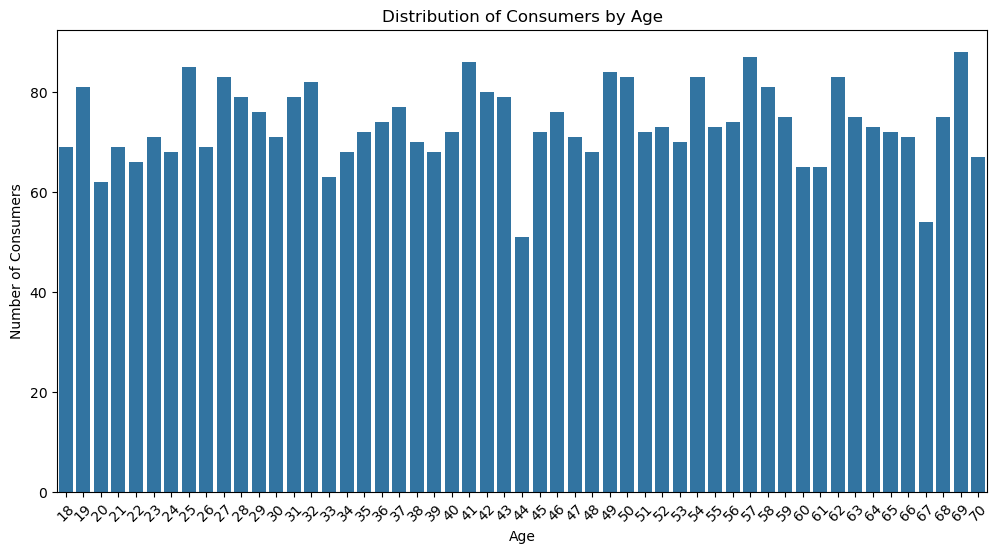

In [15]:
# Count the frequency of each age
age_counts = df['age'].value_counts()
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=age_counts.index, y=age_counts)
plt.title('Distribution of Consumers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Consumers')
plt.xticks(rotation=45)
plt.show()

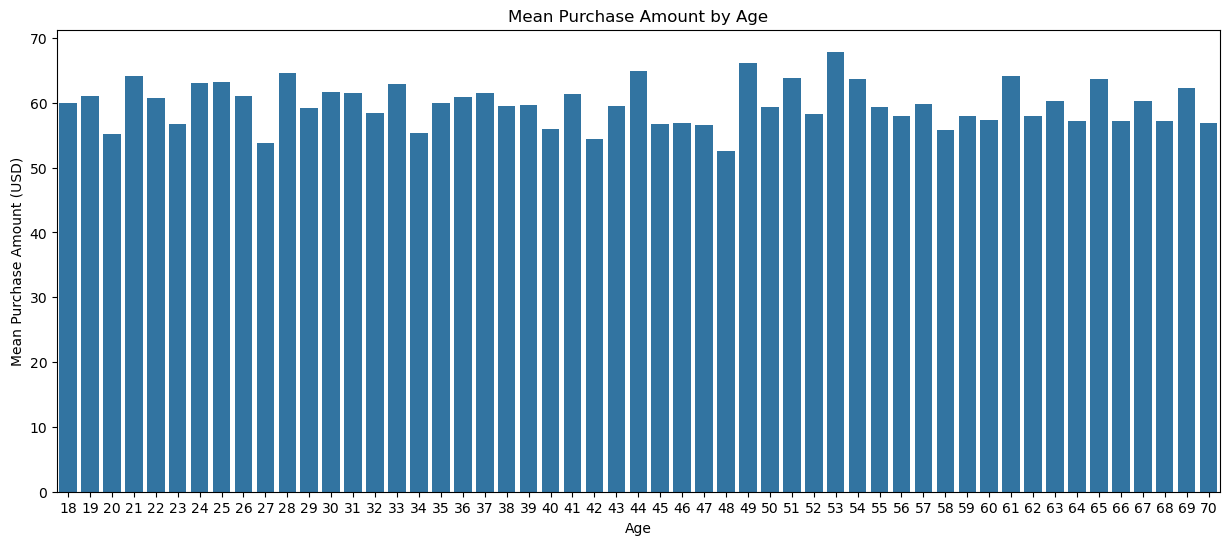

In [16]:
# Calculate mean purchase amount by age
mean_purchase_by_age = df.groupby('age')['Purchase Amount (USD)'].mean()
# Create a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x=mean_purchase_by_age.index, y=mean_purchase_by_age.values)
plt.title('Mean Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Mean Purchase Amount (USD)')
plt.show()

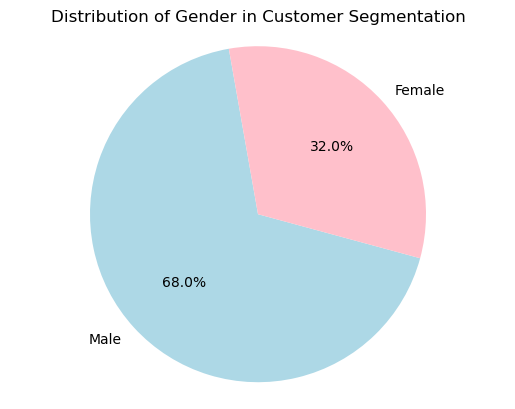

In [17]:
gender_count = customer_segmentation['gender'].value_counts()
colors = ['lightblue' if gender == 'Male' else 'pink' for gender in gender_count.index]

plt.pie(gender_count,labels=gender_count.index, autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Distribution of Gender in Customer Segmentation')
plt.axis('equal') 
plt.show()

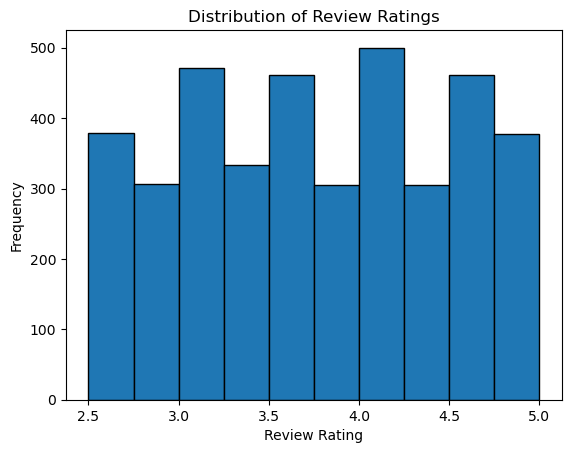

In [18]:
# Review Ratings:

# Plot the distribution of review ratings to understand customer satisfaction.

plt.hist(customer_segmentation['Review Rating'], bins=10, edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

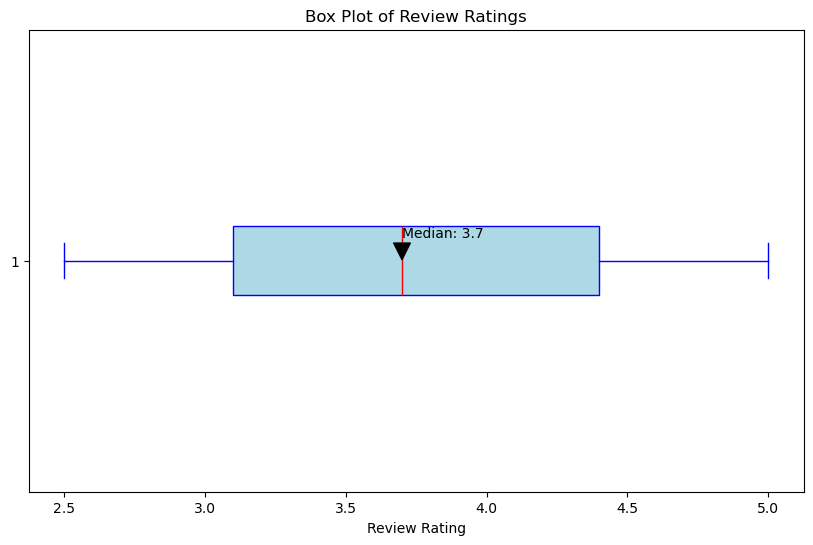

In [19]:
median_review_rating = customer_segmentation['Review Rating'].median()

plt.figure(figsize=(10, 6))
plt.boxplot(customer_segmentation['Review Rating'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.annotate(f'Median: {median_review_rating}', 
             xy=(median_review_rating, 1), 
             xytext=(median_review_rating, 1.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Box Plot of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('')
plt.show()

In [20]:
# Group the categories purchased
df_categories=df.groupby('category')
df_categories_2=pd.DataFrame(df_categories['Purchase Amount (USD)'].sum()).reset_index().sort_values('Purchase Amount (USD)',ascending=False)
df_categories_2

C:\Users\Karen\AppData\Local\Temp\ipykernel_13744\2839606400.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_categories=df.groupby('category')


,category,Purchase Amount (USD)
1,Clothing,104264.0
0,Accessories,74200.0
2,Footwear,36093.0
3,Outerwear,18524.0


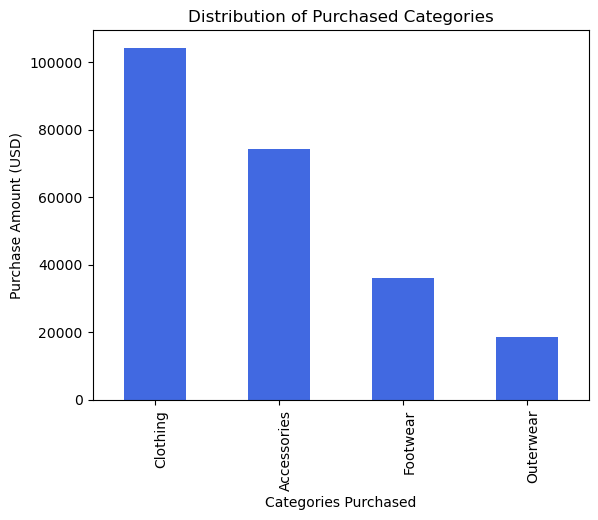

In [21]:
#Use bar plots to see the most popular categories purchased
bar_chart_categories=df_categories_2.plot(kind='bar',facecolor='royalblue',alpha=1,xlabel="Categories Purchased",ylabel="Purchase Amount (USD)",legend=False,title="Distribution of Purchased Categories")
xticklabels = df_categories_2["category"]
bar_chart_categories.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right')
plt.show()

In [22]:
# Group the items purchased
df_items_purchased=df.groupby('Item Purchased')
df_items_purchased_2=pd.DataFrame(df_items_purchased['Purchase Amount (USD)'].sum()).reset_index().sort_values('Purchase Amount (USD)',ascending=False)
df_items_purchased_2

C:\Users\Karen\AppData\Local\Temp\ipykernel_13744\2368676593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_items_purchased=df.groupby('Item Purchased')


,Item Purchased,Purchase Amount (USD)
2,Blouse,10410.0
16,Shirt,10332.0
5,Dress,10320.0
13,Pants,10090.0
12,Jewelry,10010.0
22,Sunglasses,9649.0
1,Belt,9635.0
15,Scarf,9561.0
23,Sweater,9462.0
18,Shorts,9433.0


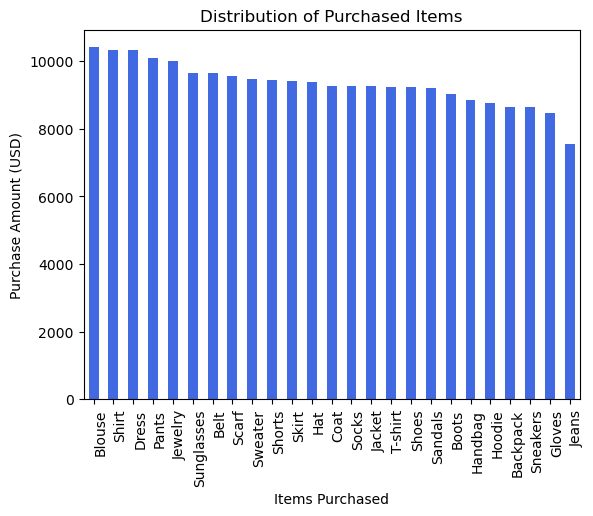

In [28]:
#Use bar plots to see the most popular items purchased.
bar_chart_items=df_items_purchased_2.plot(kind='bar',facecolor='royalblue',alpha=1,xlabel="Items Purchased",ylabel="Purchase Amount (USD)",legend=False,title="Distribution of Purchased Items")
xticklabels = df_items_purchased_2["Item Purchased"]
bar_chart_items.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right')
plt.show()

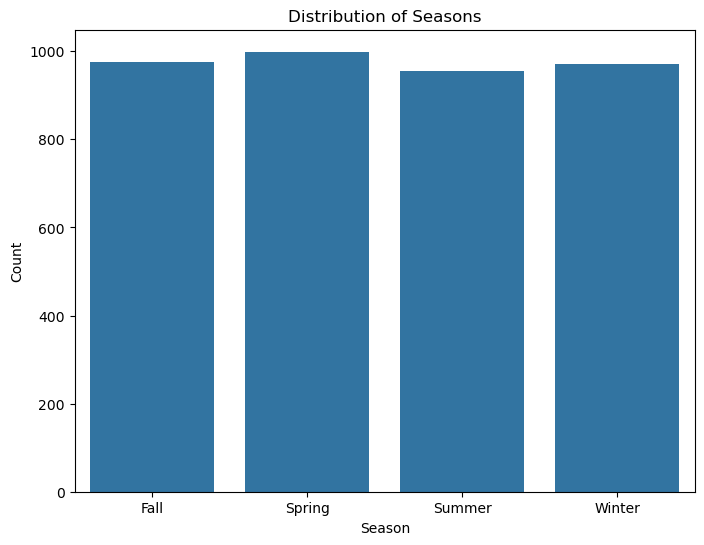

In [24]:
# Count the frequency of each season
season_counts = df['season'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


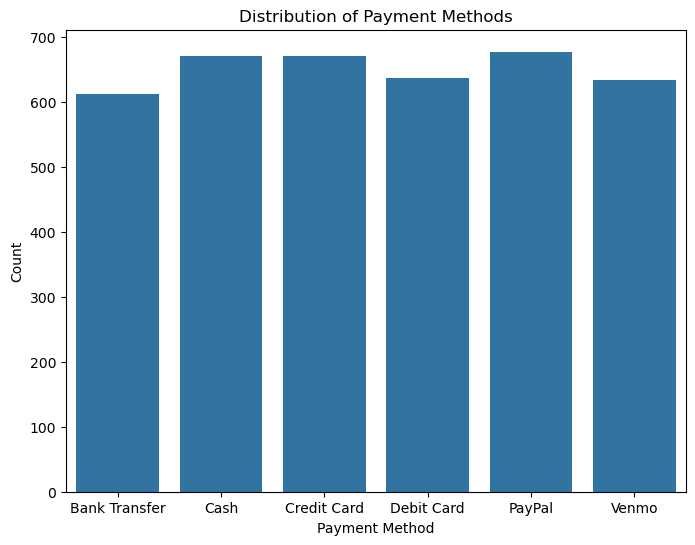

In [25]:
# Count the frequency of payment methods
method_counts = df['Payment Method'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=method_counts.index, y=method_counts)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


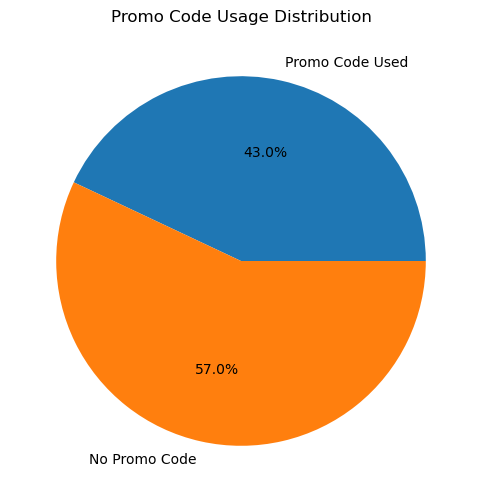

In [26]:
# Count the occurrences of 'Yes' and 'No'
promo_code_counts = df['Promo Code Used'].value_counts()

# Calculate percentages
total_sales = len(df)
promo_code_pct = (promo_code_counts['Yes'] / total_sales) * 100
no_promo_code_pct = (promo_code_counts['No'] / total_sales) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([promo_code_pct, no_promo_code_pct], labels=['Promo Code Used', 'No Promo Code'], autopct='%1.1f%%')
plt.title('Promo Code Usage Distribution')
plt.show()


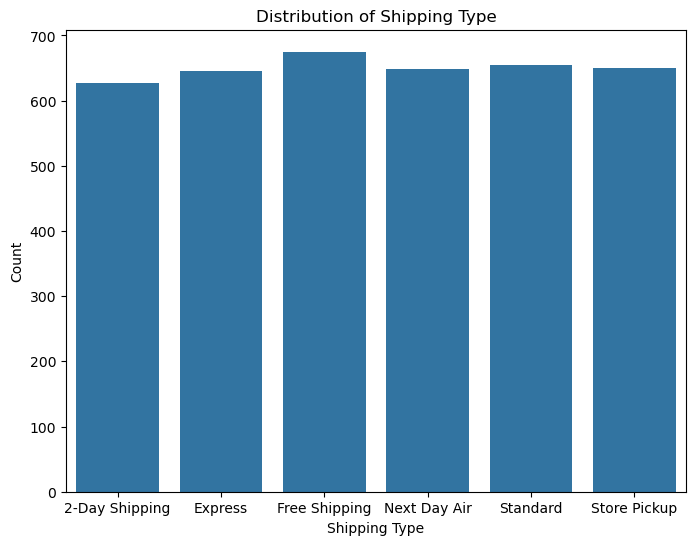

In [27]:
# Count the frequency of shipping methods
shipping_counts = df['Shipping Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts)
plt.title('Distribution of Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.show()
